In [ ]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

# credentials
cid =''
secret = ''
username = 'guschnwg'
scope = 'user-library-read playlist-read-private playlist-read-collaborative playlist-modify-private playlist-modify-public app-remote-control user-read-playback-state user-modify-playback-state user-read-currently-playing streaming'
redirect_uri='http://localhost:8888/callback'

# access user
client_credentials_manager = spotipy.oauth2.SpotifyOAuth(
    scope=scope,
    username=username,
    client_id=cid,
    client_secret=secret,
    redirect_uri=redirect_uri,
    open_browser=False,
)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_all(results, key='items'):
    all_stuff = results[key]
    while results['next']:
        results = spotify.next(results)
        all_stuff.extend(results[key])
        
    return all_stuff

In [2]:
playlists = spotify.user_playlists('guschnwg')["items"]

In [3]:
the_one = next(playlist for playlist in playlists if playlist["name"] == "Na estrada com a atual ☀️🌴🌊")
items = get_all(spotify.playlist_items(the_one["id"], fields="*"))

In [4]:
all_genres = {}
for song in items:
    artists = song["track"]["artists"]
    for artist in artists:
        genres = spotify.artist(artist["id"])["genres"]
        for genre in genres:
            if genre not in all_genres:
                all_genres[genre] = []
            
            all_genres[genre].append(song)

In [5]:
sorted_by_count = sorted(all_genres.items(), key=lambda item: len(item[1]), reverse=True)
sorted_by_count = dict(sorted_by_count)

In [6]:
for genre in sorted_by_count:
    print(f"{genre} {len(sorted_by_count[genre])}")

pop 128
dance pop 98
funk carioca 88
pop nacional 55
pop lgbtq+ brasileira 49
funk pop 37
funk rj 30
post-teen pop 26
edm 22
nova mpb 21
pagode 19
pagode baiano 19
axe 18
tropical house 18
mpb 18
electropop 15
pop dance 15
urbano latino 14
reggaeton 14
urban contemporary 14
neo mellow 14
latin pop 13
indie pop 13
arrocha 13
metropopolis 12
pop rap 11
r&b 10
pop rock 10
lilith 10
art pop 10
modern rock 8
canadian indie 8
permanent wave 8
transpop 8
samba reggae 8
forro 7
sertanejo pop 7
neo soul 7
uk pop 7
canadian pop 6
latin hip hop 6
rock 6
tecnobrega 6
barbadian pop 6
indie poptimism 6
sertanejo universitario 6
rap 5
rap latina 5
trap latino 5
reggaeton colombiano 5
deboxe 5
musica popular paraense 5
electro house 5
quiet storm 5
r&b en espanol 5
progressive house 5
boy band 5
afrofuturismo brasileiro 5
dominican pop 4
colombian pop 4
latin rock 4
indie rock 4
nova musica pernambucana 4
alt z 4
europop 4
funk 4
brazilian hip hop 4
gauze pop 4
pop rock brasileiro 4
australian pop 4
f

In [7]:
tracks = [item["track"] for item in items]

import numpy as np

all_features = []
for chunk in np.array_split(tracks, 50):
    features = spotify.audio_features([track["id"] for track in chunk])
    for feature in features:
        track = next(track for track in chunk if track["id"] == feature["id"])
        track["audio_features"] = feature

<Axes: xlabel='danceability', ylabel='valence'>

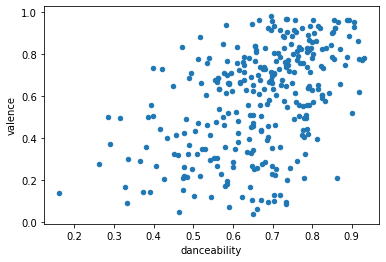

In [27]:
x = "danceability"
y = "valence"

data = [{"name": track["name"], **track["audio_features"]} for track in tracks]

import pandas as pd
import matplotlib as mtp

df = pd.DataFrame(data)
df.plot.scatter(x=x, y=y)

In [50]:
high_danceability = [track for track in tracks if track["audio_features"]["danceability"] > 0.8]
for track in high_danceability:
    print(f"Adding {track['name']}")
    spotify.add_to_queue(track["uri"])

Adding BAGUNÇA
Adding KESI - Remix
Adding Soy Yo
Adding Aloha
Adding Chama Ela (feat. Pedro Sampaio)
Adding SURRA
Adding Rito de Passá
Adding Bandida (feat. Mc Mayara)
Adding Sissy That Walk
Adding Just Dance
Adding Tuts Tuts Quero Ver Pensando Em Você
Adding O Golpe Tá Aí
Adding Deixa de Onda (Porra Nenhuma)
Adding Get the Party Started
Adding Where Is The Love?
Adding Tremendo Vacilão
Adding SAOKO
Adding Envolver
Adding Poker Face
Adding Love You Like A Love Song
Adding Banana Pancakes
Adding Better Together
Adding Play That Funky Music
Adding Tic, Tic, Tac
Adding A Cor É Rosa
Adding Love You Like A Love Song
Adding Taki Taki (with Selena Gomez, Ozuna & Cardi B)
Adding Chantaje (feat. Maluma)
Adding Con Altura
Adding Bending The End
Adding Malvada
Adding Por Supuesto
Adding 20ver
Adding Combatchy (feat. MC Rebecca)
Adding DESPECHÁ
Adding BIZCOCHITO
Adding La Loto
Adding Joga Sujo
Adding 24 horas por dia
Adding Calm Down (with Selena Gomez)
Adding Lovezinho
Adding Cavalgada
Adding sen

In [51]:
low_danceability = [track for track in tracks if track["audio_features"]["danceability"] < 0.4]
for track in low_danceability:
    print(f"Adding {track['name']}")
    spotify.add_to_queue(track["uri"])

Adding Keep Holding On
Adding The Climb
Adding Love Me Like You Do - From "Fifty Shades Of Grey"
Adding Iris
Adding O Show Tem Que Continuar
Adding Centuries
Adding Summer Paradise (feat. K'naan)
Adding Eva (Eva) - Live
Adding Você Sempre Será
Adding Black Magic Woman
Adding I Don't Want to Miss a Thing - From "Armageddon" Soundtrack
Adding When You Look Me In The Eyes
Adding Flutua
Adding Summertime
Adding Bem Te Vi
Adding Conversations in the Dark


In [52]:
high_valence = [track for track in tracks if track["audio_features"]["valence"] > 0.8]
for track in high_valence:
    print(f"Adding {track['name']}")
    spotify.add_to_queue(track["uri"])

Adding VIP *-*
Adding CAFÉ DA MANHÃ ;P
Adding KESI - Remix
Adding Despacito
Adding Pumped Up Kicks
Adding U-turn
Adding Chama Ela (feat. Pedro Sampaio)
Adding SURRA
Adding Não Que Eu Vá - Spotify Singles
Adding Rito de Passá
Adding Amor de Que
Adding K.O.
Adding S&M
Adding Solar Power
Adding Trouble
Adding Saudade Arregaça
Adding Levitating
Adding Recairei - Ao Vivo
Adding Tuts Tuts Quero Ver Pensando Em Você
Adding O Golpe Tá Aí
Adding Get the Party Started
Adding Shake It Off
Adding Sugar
Adding Where Is The Love?
Adding Tremendo Vacilão
Adding September
Adding Teenage Dream
Adding ...Baby One More Time
Adding Move Your Feet
Adding Toxic
Adding Love You Like A Love Song
Adding Whenever, Wherever
Adding Mushaboom
Adding Livre Pra Voar (Quando A Gente Se Encontrar)
Adding Amiga Da Minha Mulher
Adding Play That Funky Music
Adding Nobre Vagabundo
Adding Bola De Sabão
Adding Sorte Grande
Adding Tic, Tic, Tac
Adding My First Kiss (feat. Ke$ha)
Adding Isn't She Lovely
Adding A Cor É Rosa
Ad

In [64]:
df = pd.DataFrame(data)
df["danceability"].quantile(.9)

0.8259